# Neural & Behavioral Modeling - Week 5 (Exercises)
by 李彥廷 (b08207008@ntu.edu.tw)

In [1]:
%config IPCompleter.greedy=True 
%matplotlib inline
from numpy import *
import matplotlib.pyplot as plt
from IPython.display import *
from scipy.stats import *
import pandas as pd

## 1 Drifit Diffusion Model (4+4 points)

Use whatever analytical methods to check if Tren's super EZ implementation(s) of the drift diffusion model produce exGaussian data, especially the exponential long tail. Remember to play around with different model parameters to see how they affect simulation results.

Hints:

[1] For parameter estimation of the ex-Gaussian distribution, you can use scipy.stats.exponnorm.fit().

[2a] You can compare two distributions by Q-Q plots or the Kolmogorov–Smirnov test

[2b] Alternatively, you can compare AIC/BIC to answer whether Exponential, Gaussian, or ex-Gaussian best fits Tren's data.

<font color="red">Please carry out the same analysis for both types of diffusion (4 points each)!</font>

In [2]:
# Tren's implementation
def DDM(typ, mu=0.2,sigma=2,p=0.4,Yend=20):
    Ntrial=1000
    RTs=zeros(Ntrial)
    if typ==1:
        for i in range(Ntrial):
            Y=0 # initial drift position
            Ys=[] # drift history
            RT=0 # Reset watch
            while(Y<Yend):
                dY=mu+random.normal(mu,sigma); # type1
                Y=Y+dY
                Ys.append(Y); # Diffusion history in each trial
                RT=RT+1 # clock is running
            RTs[i]=RT;
    else:
        for i in range(Ntrial):
            Y=0 # initial drift position
            Ys=[] # drift history
            RT=0 # Reset watch
            while(Y<Yend):
                dY=float((random.rand(1)-p)>0); # type2
                Y=Y+dY
                Ys.append(Y); # Diffusion history in each trial
                RT=RT+1 # clock is running
            RTs[i]=RT; 
    return RTs

In [3]:
def PlotandKStest(RTs,dist):
    if dist=='exponnorm':
        params = exponnorm.fit(RTs)
        rv = exponnorm(*params)
    elif dist=='norm':
        params = norm.fit(RTs)
        rv = norm(*params)
    else:
        params = expon.fit(RTs)
        rv = expon(*params)
        
    fig, axs = plt.subplots(1,2, figsize=(9,4))
    x = linspace(rv.ppf(0.01),rv.ppf(0.99),100) # x from quantile function
    axs[0].plot(x, rv.pdf(x), lw=2) # pdf
    axs[0].hist(RTs,bins=25,density=True);
    axs[0].set_xlabel(f'{dist}',size=12)
    probplot(RTs,dist=rv,plot=axs[1]);
    print("Kolmogorov–Smirnov test:")
    st,p = kstest(RTs,rv.cdf)
    print('p-value =',p)
    if p < 0.05:
        print(f'Reject that RTs is sampled from {dist}')
    else:
        print(f'Can\'t reject that RTs is sampled from {dist}')
    print()

In [4]:
def getIC(RTs, dist):
    if dist=='exponnorm':
        params = exponnorm.fit(RTs)
        rv = exponnorm(*params)
    elif dist=='norm':
        params = norm.fit(RTs)
        rv = norm(*params)
    else:
        params = expon.fit(RTs)
        rv = expon(*params)
    density = rv.pdf(RTs)
    LLH = sum(log(density))
    n = len(RTs)
    k = len(params)
    AIC = 2*k-2*LLH
    BIC = log(n)*k-2*LLH
    return dist, LLH, AIC, BIC

## 1.1 Type 1 Drift Diffusion Model 

In [5]:
RTs = DDM(typ=1)

### 1.1.1 Ex-Gaussian Distribution

Kolmogorov–Smirnov test:
p-value = 0.8881200513946759
Can't reject that RTs is sampled from exponnorm



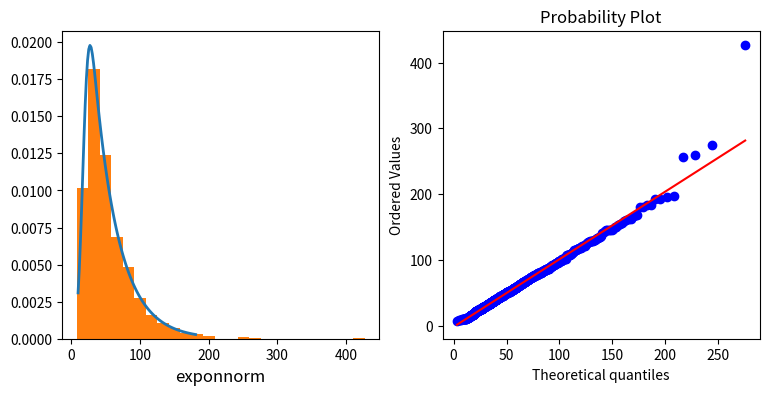

In [6]:
PlotandKStest(RTs,'exponnorm')

### 1.1.2 Normal Distribution

Kolmogorov–Smirnov test:
p-value = 5.5067233761713006e-17
Reject that RTs is sampled from norm



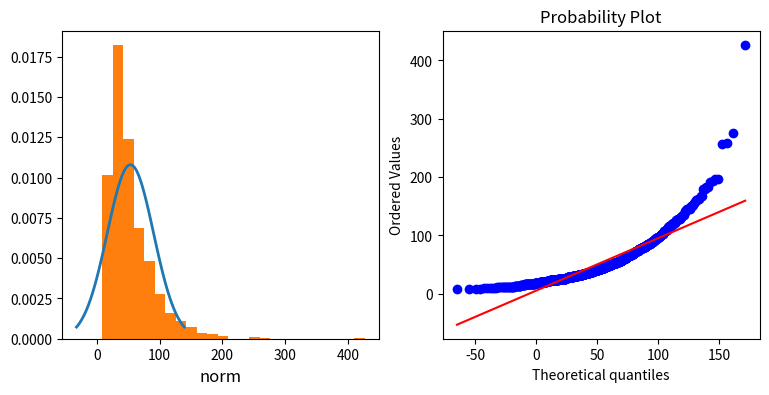

In [7]:
PlotandKStest(RTs,'norm')

### 1.1.3 Exponential Distribution

Kolmogorov–Smirnov test:
p-value = 5.9265654298981754e-21
Reject that RTs is sampled from expon



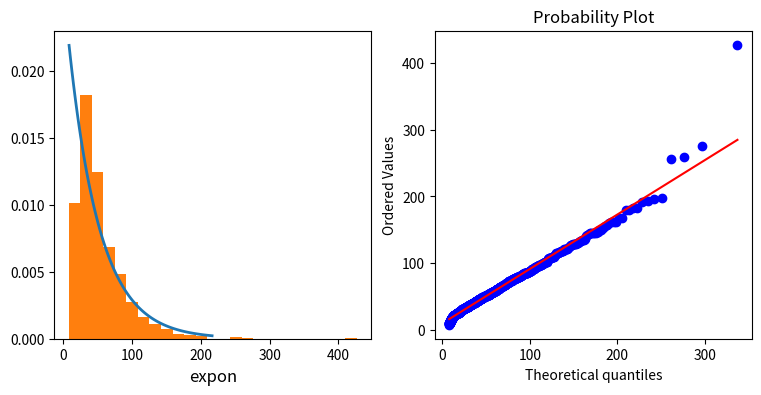

In [8]:
PlotandKStest(RTs,'expon')

## 1.2 Model Comparison for Type 1 DDM

In [9]:
ModelComparison = pd.DataFrame([getIC(RTs, 'exponnorm'),
                   getIC(RTs, 'norm'),
                   getIC(RTs, 'expon')],
                  columns=['Distribution','LLH','AIC','BIC']).set_index('Distribution')
ModelComparison

,LLH,AIC,BIC
Distribution,,,
exponnorm,-4723.769872,9453.539744,9468.26301
norm,-5028.667475,10061.334949,10071.15046
expon,-4812.070065,9628.140129,9637.95564


可以看到使用Ex-Gaussian來fit的表現最好

## 1.3 Type 2 Drift Diffusion Model 

In [10]:
RTs = DDM(typ=2)

### 1.3.1 Ex-Gaussian Distribution

Kolmogorov–Smirnov test:
p-value = 0.005178360504552025
Reject that RTs is sampled from exponnorm



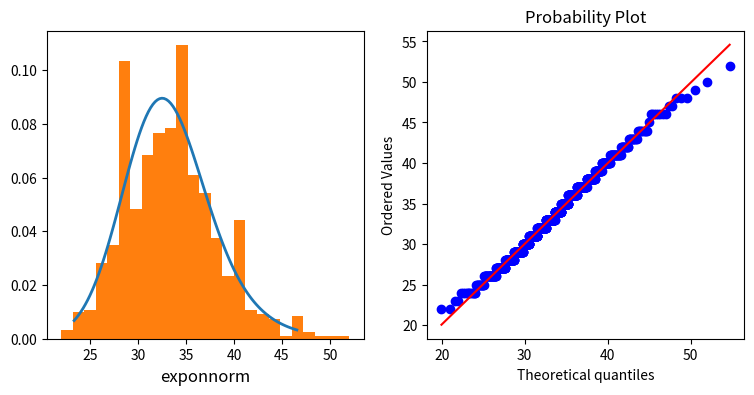

In [11]:
PlotandKStest(RTs,'exponnorm')

### 1.3.2 Normal Distribution

Kolmogorov–Smirnov test:
p-value = 4.037459285265464e-06
Reject that RTs is sampled from norm



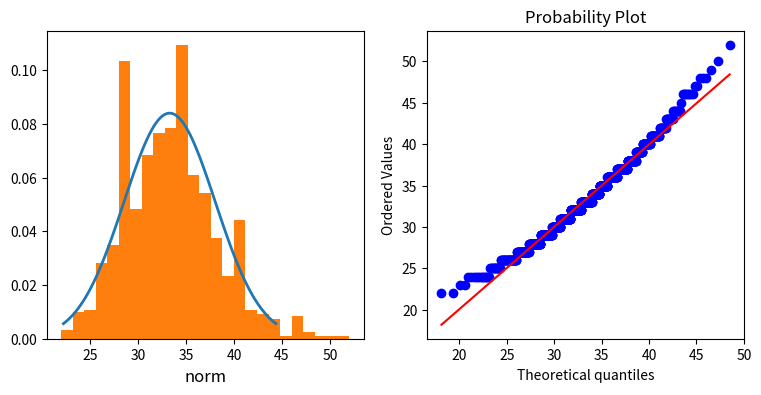

In [12]:
PlotandKStest(RTs,'norm')

### 1.3.3 Exponential Distribution

Kolmogorov–Smirnov test:
p-value = 4.8300551478581855e-84
Reject that RTs is sampled from expon



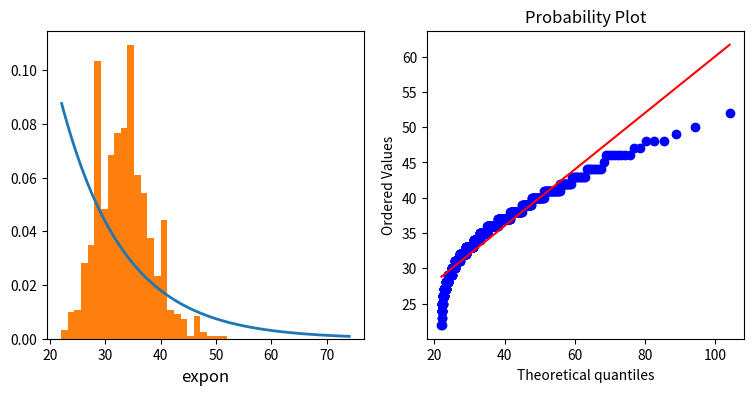

In [13]:
PlotandKStest(RTs,'expon')

## 1.4 Model Comparison for Type 2 DDM

In [14]:
ModelComparison = pd.DataFrame([getIC(RTs, 'exponnorm'),
                   getIC(RTs, 'norm'),
                   getIC(RTs, 'expon')],
                  columns=['Distribution','Log Likelihood','AIC','BIC']).set_index('Distribution')
ModelComparison

,Log Likelihood,AIC,BIC
Distribution,,,
exponnorm,-2963.305552,5932.611103,5947.334369
norm,-2977.487442,5958.974884,5968.790395
expon,-3425.422003,6854.844006,6864.659516


## 1.5 Manipulate Model Parameters

### Type 1

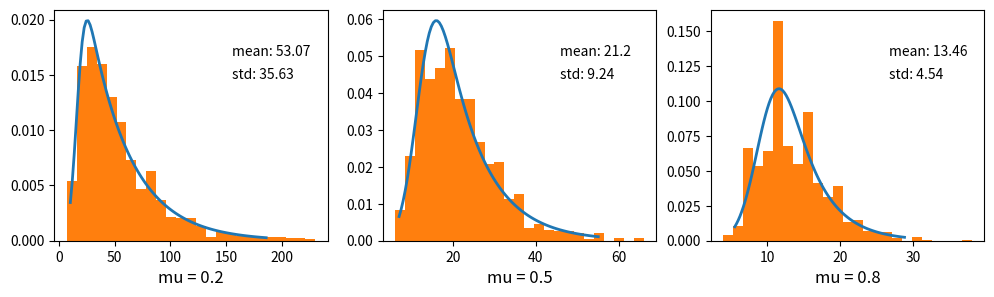

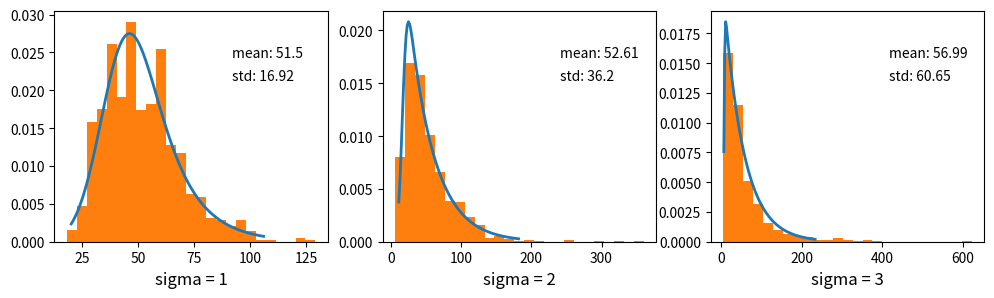

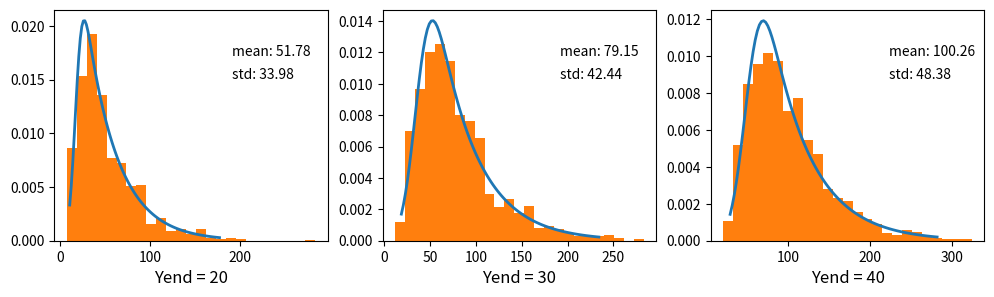

In [15]:
typ = 1
mus = [0.2, 0.5, 0.8]
sigmas = [1,2,3]
Yends = [20, 30 ,40]
DDM(typ, mu=0.2,sigma=2,p=0.4,Yend=20)
RTs_mu = [DDM(typ, mu=mu) for mu in mus]
RTs_sigma = [DDM(typ, sigma=s) for s in sigmas]
RTs_Yends = [DDM(typ, Yend=y) for y in Yends]
fig, axes = plt.subplots(1,3, figsize=(12,3))
for i in range(3):
    params = exponnorm.fit(RTs_mu[i])
    rv = exponnorm(*params)        
    x = linspace(rv.ppf(0.01),rv.ppf(0.99),100) # x from quantile function
    axes[i].plot(x, rv.pdf(x), lw=2) # pdf
    axes[i].hist(RTs_mu[i],bins=25,density=True);
    axes[i].set_xlabel(f'mu = {mus[i]}',size=12)
    showmeanText = f'mean: {round(RTs_mu[i].mean(),2)}'
    showstdText = f'std: {round(RTs_mu[i].std(),2)}'
    axes[i].annotate(showmeanText, xy=(0.65, 0.8), xycoords='axes fraction')
    axes[i].annotate(showstdText, xy=(0.65, 0.7), xycoords='axes fraction')
fig, axes = plt.subplots(1,3, figsize=(12,3))
for i in range(3):
    params = exponnorm.fit(RTs_sigma[i])
    rv = exponnorm(*params)        
    x = linspace(rv.ppf(0.01),rv.ppf(0.99),100) # x from quantile function
    axes[i].plot(x, rv.pdf(x), lw=2) # pdf
    axes[i].hist(RTs_sigma[i],bins=25,density=True);
    axes[i].set_xlabel(f'sigma = {sigmas[i]}',size=12)
    showmeanText = f'mean: {round(RTs_sigma[i].mean(),2)}'
    showstdText = f'std: {round(RTs_sigma[i].std(),2)}'
    axes[i].annotate(showmeanText, xy=(0.65, 0.8), xycoords='axes fraction')
    axes[i].annotate(showstdText, xy=(0.65, 0.7), xycoords='axes fraction')
fig, axes = plt.subplots(1,3, figsize=(12,3))
for i in range(3):
    params = exponnorm.fit(RTs_Yends[i])
    rv = exponnorm(*params)        
    x = linspace(rv.ppf(0.01),rv.ppf(0.99),100) # x from quantile function
    axes[i].plot(x, rv.pdf(x), lw=2) # pdf
    axes[i].hist(RTs_Yends[i],bins=25,density=True);
    axes[i].set_xlabel(f'Yend = {Yends[i]}',size=12)
    showmeanText = f'mean: {round(RTs_Yends[i].mean(),2)}'
    showstdText = f'std: {round(RTs_Yends[i].std(),2)}'
    axes[i].annotate(showmeanText, xy=(0.65, 0.8), xycoords='axes fraction')
    axes[i].annotate(showstdText, xy=(0.65, 0.7), xycoords='axes fraction')

可以看到：
1. mu (drift rate)越大，反應時間越快，標準差也小
2. simga (noise) 越大，反應時間分佈的標準差越大，因為noise變多了，較容易出現大的值
3. Yend變大時，需要達到閾值的時間愈久，因此RT平均值變大。

## 2 Replicate exisiting findings/models (4+4 points)

Based on your personal interest, please choose and replicate ONE of the following studies. You can replicate 2 core figures/tables <font color="red">(4points each)</font> instead of everything in the paper.

### 2.1 Embodied Cognition

2.1.1 Thelen, E., Schöner, G., Scheier, C., & Smith, L. B. (2001). The dynamics of embodiment: A field theory of infant perseverative reaching. Behavioral and Brain Sciences, 24(1), 1-86.


### 2.2 Instructed Learning

2.2.1 **Biele, G., Rieskamp, J., & Gonzalez, R. (2009). Computational models for the combination of advice and individual learning. Cognitive Science, 33(2), 206-242.**

2.2.2 Doll, B. B., Jacobs, W. J., Sanfey, A. G., & Frank, M. J. (2009). Instructional control of reinforcement learning: A behavioral and neurocomputational investigation. Brain Research, 1299, 74–94.

2.2.3 Li, J., Delgado, M. R., & Phelps, E. A. (2011). How instructed knowledge modulates the neural systems of reward learning. Proceedings of the National Academy of Sciences, U.S.A., 108, 55–60. (Their <a href=http://www.pnas.org/lookup/suppl/doi:10.1073/pnas.1014938108/-/DCSupplemental/sapp.pdf>supplementary document</a> contains more details about their model.)

我選了 2.2.1的論文來做模擬
先建立論文提出的五個模型來模擬Iowa Gambling Task在advice and individual learning的行為
我使用論文fit好的參數來模擬，不過不知道為什麼在這樣的參數之下，softmax的機率會爆掉，然後就divide error或nan error
所以我沒把圖給做出來。

In [16]:
A1 = [[50,0]]*5 + [[50,-125]]*5
B1 = [[50,0]]*9 + [[50,-625]]*1
C1 = [[25,0]]*5 + [[25,-25]]*5
D1 = [[25,0]]*9 + [[25,-125]]*1
A = [[50,0]]*5 + [[50,-125]]*5
B = [[50,0]]*9 + [[50,-625]]*1
C = [[25,0]]*5 + [[25,-25]]*5
D = [[25,0]]*9 + [[25,-125]]*1
random.shuffle(A)
random.shuffle(B)
random.shuffle(C)
random.shuffle(D)
A = A1+A*9
B = B1+B*9
C = C1+C*9
D = D1+D*9

pi = [A,B,C,D]

In [17]:
def choose(plist):
    thisOption = random.choice(arange(4), p=plist)
    return thisOption

## RL

In [18]:
def RLIGT(phi, lam, fc, pi=pi):
    qlist = [0,0,0,0]
    choselist = []
    for i in range(100):
        plist = array([exp(lam*q) for q in qlist])
        plist = plist/plist.sum()
        if i != 0:
            co = choose(plist)
        else:
            co = fc
        choselist.append(co)
        r = [0]*4
        r[co] = sum(pi[co][i])
        qlist = [(1-phi)*qlist[i] + r[i] for i in range(len(qlist))]
    return choselist

philist = random.normal(0.16,.1,size=100)
lamlist = random.normal(3.26,.2,size=100)

In [19]:
RLchoselist = []
for sub in range(100):
    choselist = RLIGT(philist[sub],lamlist[sub], fc=2+sub%2,pi=pi)
    RLchoselist.append(choselist)

/var/folders/kd/bdrqt3tj351gf36v20dm1wqr0000gn/T/ipykernel_1574/1497333953.py:5: RuntimeWarning: overflow encountered in exp
  plist = array([exp(lam*q) for q in qlist])
/var/folders/kd/bdrqt3tj351gf36v20dm1wqr0000gn/T/ipykernel_1574/1497333953.py:6: RuntimeWarning: invalid value encountered in divide
  plist = plist/plist.sum()


ValueError: probabilities contain NaN

## ARC Initial

In [ ]:
def ARCIIGT(phi, lam, fc, l, pi=pi):
    qlist = [0,0,0,0]
    qlist[fc] = 12.5*l
    choselist = []
    for i in range(100):
        plist = array([exp(lam*q) for q in qlist])
        plist = plist/plist.sum()
        co = choose(plist)
        choselist.append(co)
        r = [0]*4
        r[co] = sum(pi[co][i])
        qlist = [(1-phi)*qlist[i] + (r[i]) for i in range(len(qlist))]
    return choselist

philist = random.normal(0.18,.05,size=100)
lamlist = random.normal(1.55,.05,size=100)
llist = random.normal(21.18,.05,size=100)

In [ ]:
ARCIchoselist = []
for sub in range(100):
    choselist = ARCIIGT(philist[sub],lamlist[sub], fc=2+sub%2,l=llist[sub],pi=pi)
    ARCIchoselist.append(choselist)

## ARC bonus outcome

In [ ]:
def ARCBIGT(phi, lam, fc, rho, pi=pi):
    qlist = [0,0,0,0]
    choselist = []
    for i in range(100):
        plist = array([exp(lam*q) for q in qlist])
        plist = plist/plist.sum()
        co = choose(plist)
        choselist.append(co)
        r = [0]*4
        r[co] = sum(pi[co][i])
        rholist = [0]*4
        rholist[fc] = 12.5*rho
        qlist = [(1-phi)*qlist[i] + (r[i]+rholist[i]) for i in range(len(qlist))]
    return choselist

philist = random.normal(0.36,.05,size=100)
lamlist = random.normal(3.1,.05,size=100)
rholist = random.normal(3.89,.05,size=100)

In [ ]:
ARCBchoselist = []
for sub in range(100):
    choselist = ARCBIGT(philist[sub],lamlist[sub], fc=2+sub%2,rho=rholist[sub],pi=pi)
    ARCBchoselist.append(choselist)

## ARC Decay

In [ ]:
def ARCDIGT(phi, lam, fc, phi2, pi=pi):
    qlist = [0,0,0,0]
    choselist = []
    for i in range(100):
        plist = array([exp(lam*q) for q in qlist])
        plist = plist/plist.sum()
        co = choose(plist)
        choselist.append(co)
        r = [0]*4
        r[co] = sum(pi[co][i])

        if co != fc:
            qlist = [(1-phi)*qlist[i] + (r[i]) for i in range(len(qlist))]
        else:
            qlist = [(1-phi2)*qlist[i] + (r[i]) for i in range(len(qlist))]
            
    return choselist

philist = random.normal(0.52,.05,size=100)
lamlist = random.normal(3.09,.05,size=100)
phi2list = random.normal(.17,.05,size=100)

In [ ]:
ARCDchoselist = []
for sub in range(100):
    choselist = ARCDIGT(philist[sub],lamlist[sub], fc=2+sub%2,phi2=phi2list[sub],pi=pi)
    ARCDchoselist.append(choselist)

## ARC Certainty

In [ ]:
def ARCCIGT(phi, lam, fc, tau, pi=pi):
    qlist = [0,0,0,0]
    choselist = []
    for i in range(100):
        plist = array([exp(lam*q) for q in qlist])
        plist = plist/plist.sum()
        if plist.std()>tau:
            plist = [0] * 4
            plist[fc] =  1
        co = choose(plist)
        choselist.append(co)
        r = [0]*4
        r[co] = sum(pi[co][i])
        qlist = [(1-phi)*qlist[i] + (r[i]) for i in range(len(qlist))]
    return choselist

philist = random.normal(0.32,.05,size=100)
lamlist = random.normal(2.44,.05,size=100)
taulist = random.normal(.16,.05,size=100)

In [ ]:
ARCCchoselist = []
for sub in range(100):
    choselist = ARCCIGT(philist[sub],lamlist[sub], fc=2+sub%2,tau=taulist[sub],pi=pi)
    ARCDchoselist.append(choselist)